In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import os
os.getcwd()

'C:\\Users\\arwen\\Documents\\ESAA활동(21-2)\\9주차 과제'

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())  #outcome 클래스 결정값의 분포 확인
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
diabetes_data.shape

(768, 9)

전체 768개의 데이터 중에서 negative 값 0이 500개, positive 값 1이 268개로 negative 가 상대적으로 많다.

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
#맨 끝이 outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y) 
#stratify 층별 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출을 해줍니다.

In [10]:
#로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

C:\Users\arwen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
lr_clf.predict_proba(X_test)

array([[0.97821353, 0.02178647],
       [0.79163298, 0.20836702],
       [0.84504357, 0.15495643],
       [0.50582191, 0.49417809],
       [0.95476036, 0.04523964],
       [0.41163054, 0.58836946],
       [0.25591107, 0.74408893],
       [0.79616391, 0.20383609],
       [0.84894313, 0.15105687],
       [0.84439183, 0.15560817],
       [0.32174984, 0.67825016],
       [0.50120658, 0.49879342],
       [0.93443015, 0.06556985],
       [0.58954182, 0.41045818],
       [0.78917802, 0.21082198],
       [0.87854103, 0.12145897],
       [0.24615073, 0.75384927],
       [0.59348462, 0.40651538],
       [0.9641375 , 0.0358625 ],
       [0.2149399 , 0.7850601 ],
       [0.53766637, 0.46233363],
       [0.69851692, 0.30148308],
       [0.93184634, 0.06815366],
       [0.66022119, 0.33977881],
       [0.65651222, 0.34348778],
       [0.88829331, 0.11170669],
       [0.08231751, 0.91768249],
       [0.34439401, 0.65560599],
       [0.82960382, 0.17039618],
       [0.18822631, 0.81177369],
       [0.

In [12]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [13]:
X_test.shape

(154, 8)

정확도 = (TN+TP)/(TN+FP+FN+TP)<br>
정밀도 = TP/(FP+TP) 예측을 POSITIVE로 한 대상 중에 예측과 실제값이 POSITIVE로 일치<br>
재현율 = TP/(FN+TP) 실제 값이 POSITIVE인 대상 중에 예측과 실제값이 POSITIVE로 일치한 데이터 비율<br>
오차행렬 <br>
세로: 실제클래스 가로:예측클래스 <br>

In [14]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 =f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC={4:.4f}".format(accuracy,precision,recall,f1,roc_auc))

In [15]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1:0.6392, AUC=0.7919


예측 정확도가 77.27% 재현율은 57.41%로 측정되었다. Negative로 예측된 값이 88+23=111/154(예측값 전체 개수)으로 전체 데이터의 72%이므로 정확도보다는 재현율 성능에 더 초점을 맞춰보도록 하겠다. 먼저 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인하겠다. precision_recall_curve_plot()함수를 이요해 임곗값별 정밀도와 재현율 값의 변화를 확인하자.

precision_recall_curve()는 일반적으로 0.11~0.95 정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환합니다.

In [16]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    #threshold 값 X축의 scale을 0.1 단위로 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    #x축, y축 label과 legen, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()


In [17]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve(y_test,pred_proba_c1)

(array([0.35064935, 0.34640523, 0.34868421, 0.34437086, 0.34666667,
        0.34228188, 0.34459459, 0.34693878, 0.34931507, 0.35172414,
        0.35416667, 0.35664336, 0.35915493, 0.36170213, 0.36428571,
        0.36690647, 0.36956522, 0.37226277, 0.375     , 0.37777778,
        0.38059701, 0.38345865, 0.38636364, 0.38931298, 0.39230769,
        0.39534884, 0.3984375 , 0.4015748 , 0.4047619 , 0.4       ,
        0.40322581, 0.40650407, 0.40983607, 0.41322314, 0.41666667,
        0.42016807, 0.42372881, 0.42735043, 0.43103448, 0.43478261,
        0.43859649, 0.44247788, 0.44642857, 0.45045045, 0.45454545,
        0.4587156 , 0.46296296, 0.46728972, 0.47169811, 0.46666667,
        0.47115385, 0.46601942, 0.47058824, 0.47524752, 0.48      ,
        0.48484848, 0.48979592, 0.48453608, 0.48958333, 0.49473684,
        0.4893617 , 0.49462366, 0.5       , 0.49450549, 0.5       ,
        0.50561798, 0.51136364, 0.51724138, 0.51162791, 0.50588235,
        0.5       , 0.5060241 , 0.51219512, 0.51

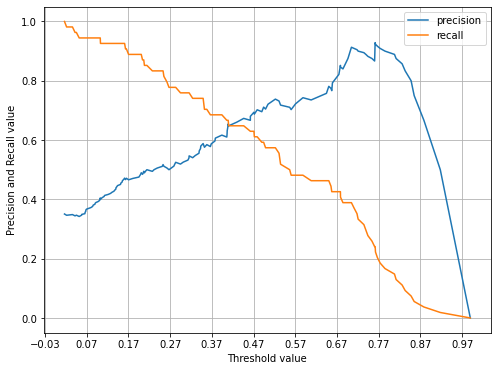

In [18]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

재현율 곡선을 보면 임곗값을 0.42정도로 낮추면 정밀도와 재현율이 어느 정도 균혀을 맞출 것 같다. 하지만 두개의 지표 모두 0.7이 안되는 수치로 보인다. 여전히 두 지표의 값이 낮다. 임곗값을 인위적으로 조작하기 전에 다시 데이터 값을 점검하겠다. 먼저 원본 데이터 DataFrame의 describe()메서드를 호출해 피처 값의 분포도를 살펴보겠다.

In [19]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


diabetes_data.describe()데이터 값을 보면 min()값이 0으로 돼 있는 피처가 상당히 많다. 예를 들어 Glucose 피처는 포도당 수치인데 min값이 0인 것은 말이 되지 않는다. Glucose 피처의 히스토그램을 확인해보면 0값이 일정 수준 존재하는 것을 알 수 있습니다.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

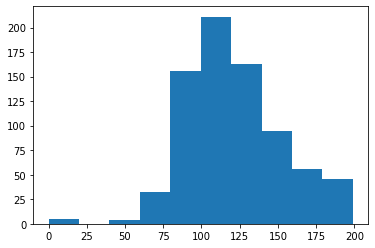

In [20]:
plt.hist(diabetes_data['Glucose'],bins=10)

min() 값이 0으로 돼 있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인해 보겠다. 확인할 피처는 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' 이다.(Pregnancies는 출산 횟수를 의미하므로 제외합니다.)

In [21]:
#0값을 검사할 피처명 리스트
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수->768개
total_count = diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


SkinThickness와 Insulin의 0값은 각각 전체의 29.56%,48.7%로 대단히 많다. 전체 데이터 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우에는 학습을 효과적으로 수행하기 어려울 것 같습니다. 위 피처의 0값을 평균값으로 대체하겠다.

In [22]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[feature].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환하겠습니다. 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋습니다. 이후에 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인하겠습니다.

In [23]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=156,stratify=y)

In [24]:
#로지스틱 회귀로 학습,예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [25]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[89 11]
 [20 34]]
정확도: 0.7987, 정밀도: 0.7556, 재현율: 0.6296, F1:0.6869, AUC=0.8198


데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선되었다. 하지만 여전히 재현율 수치는 개선이 필요해보임. 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인해보겠다. 다음 코드는 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력합니다. 임곗값에 따른 평가 수치 출력은 앞에서 사용한 get_eval_by_threshold() 함수를 이용합니다.

Binarizer의 threshold 값보다 작으면 0을 크면 1을 반환함.

In [26]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    #threshold list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:",custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [27]:
thresholds= [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.3


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pred_proba[:,1].reshape(-1,1)

임곗값은 0.48 로 낮춘 상태에서 다시 예측을 해보겠습니다.사이킷런의 predict() 메서드는 임곗값을 마음대로 변환할 수 없으므노 별도의 로직으로 이를 구해야 합니다. 앞에서 살펴본 Binarizer 클래스를 이용해 predict_proba()로 추출한 예측 결과 확률값을 변환해 변경된 임곗값에 따른 예측 클래스 값을 구해 보겠습니다.

In [ ]:
#임곗값을 0.48로 설정한 Binearizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])